In [9]:
import re
import pandas as pd
import numpy as np
from collections import OrderedDict, defaultdict

# Set Pandas to display all rows of dataframes
pd.set_option('display.max_rows', 500)

from pymystem3 import Mystem
from string import punctuation

from dostoevsky.tokenization import UDBaselineTokenizer
from dostoevsky.word_vectors import SocialNetworkWordVectores
from dostoevsky.models import SocialNetworkModel

from nltk import tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')

# Plotting tools
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from tqdm import tqdm_notebook as tqdm
from tqdm import trange

In [44]:
novel = "data/Толстой, Лев Николаевич - Анна Каренина.txt"

In [45]:
with open(novel, 'r') as f:
    raw_text = f.read()

In [46]:
# Remove erroneous double-spaces
text = re.sub(r"(?<=[А-Яа-я,-])(\s\s)(?=[А-Яа-я,-])", " ", raw_text)

# Remove hyphens in words split by line break
text = re.sub(r"(?<=[А-Яа-я])(-\n)(?=[А-Яа-я])", "", text)

# Remove unnecessary line breaks
# text = re.sub(r"(?:[А-Яа-я])(\n)(?:[А-Яа-я\n \.])", "", raw_text)
text = re.sub(r"(?<!\n)(\n)(?!(  |\n))", " ", text)

In [47]:
ak = OrderedDict()

parts = re.findall(r"(ЧАСТЬ [А-Я]+)", text)  # Split the book into the different parts

for part in parts:
    part_text = re.search(r"{}([\w\W:]*?)(ЧАСТЬ|Конец\s*\n)".format(part), text)  # Extract the content of each part
    chapters = re.findall(r"\n*\s*([IVX]+)\n*([\w\W:]*?)(?=\s{5}[IVX]+(?![a-z])|$)", part_text.group(1))  # Extract the chapter number and text for each part
    chapters = OrderedDict([(item[0], item[1].rstrip()) for item in chapters])
    ak[part] = OrderedDict(chapters)

In [6]:
tokenizer = UDBaselineTokenizer()
word_vectors_container = SocialNetworkWordVectores()
model = SocialNetworkModel(tokenizer=tokenizer,
                           word_vectors_container=word_vectors_container,
                           lemmatize=False)

In [51]:
for part in ak:
    print(part)
    for chapter in ak[part]:
        print(chapter)
        text = ak[part][chapter].replace('\n', '')
        sentence_list = tokenize.sent_tokenize(text)

        sentiments = {'negative': 0.0,
                      'neutral': 0.0,
                      'positive': 0.0,
                      'skip': 0.0,
                      'unknown': 0.0,
                      'speech': 0.0}

        for sentence in sentence_list:
            sentiment = model.predict([sentence])
            sentiments[sentiment[0]] += 1
            
        total = len(sentence_list)
        sentiments = {k: v / total for k, v in sentiments.items()}

        ak[part][chapter] = (ak[part][chapter], sentiments)
#     print()

ЧАСТЬ ПЕРВАЯ
I
II
III
IV
V
VI
VII
VIII
IX
X
XI
XII
XIII
XIV
XV
XVI
XVII
XVIII
XIX
XX
XXI
XXII
XXIII
XXIV
XXV
XXVI
XXVII
XXVIII
XXIX
XXX
XXXI
XXXII
XXXIII
XXXIV
ЧАСТЬ ВТОРАЯ
I
II
III
IV
V
VI
VII
VIII
IX
X
XI
XII
XIII
XIV
XV
XVI
XVII
XVIII
XIX
XX
XXI
XXII
XXIII
XXIV
XXV
XXVI
XXVII
XXVIII
XXIX
XXX
XXXI
XXXII
XXXIII
XXXIV
XXXV
ЧАСТЬ ТРЕТЬЯ
I
II
III
IV
V
VI
VII
VIII
IX
X
XI
XII
XIII
XIV
XV
XVI
XVII
XVIII
XIX
XX
XXI
XXII
XXIII
XXIV
XXV
XXVI
XXVII
XXVIII
XXIX
XXX
XXXI
XXXII
ЧАСТЬ ЧЕТВЕРТАЯ
I
II
III
IV
V
VI
VII
VIII
IX
X
XI
XII
XIII
XIV
XV
XVI
XVII
XVIII
XIX
XX
XXI
XXII
XXIII
ЧАСТЬ ПЯТАЯ
I
II
III
IV
V
VI
VII
VIII
IX
X
XI
XII
XIII
XIV
XV
XVI
XVII
XVIII
XIX
XX
XXI
XXII
XXIII
XXIV
XXV
XXVI
XXVII
XXVIII
XXIX
XXX
XXXI
XXXII
XXXIII
ЧАСТЬ ШЕСТАЯ
I
II
III
IV
V
VI
VII
VIII
IX
X
XI
XII
XIII
XIV
XV
XVI
XVII
XVIII
XIX
XX
XXI
XXII
XXIII
XXIV
XXV
XXVI
XXVII
XXVIII
XXIX
XXX
XXXI
XXXII
ЧАСТЬ СЕДЬМАЯ
I
II
III
IV
V
VI
VII
VIII
IX
X
XI
XII
XIII
XIV
XV
XVI
XVII
XVIII
XIX
XX
XXI
XXII
XXIII
XXIV
XXV
XXVI
XXVII
XXVI

In [52]:
compound_sentiments = [ak[part][chapter][1]['neutral'] for part in ak for chapter in ak[part]]

In [53]:
chap = 0
for part in ak:
    print(part)
    part_chap = 1
    for chapter in ak[part]:
        print('  Chapter', part_chap)
        print('     ', compound_sentiments[chap])
        part_chap += 1
        chap += 1
    print()

ЧАСТЬ ПЕРВАЯ
  Chapter 1
      0.6382978723404256
  Chapter 2
      0.7529411764705882
  Chapter 3
      0.6857142857142857
  Chapter 4
      0.671875
  Chapter 5
      0.7469135802469136
  Chapter 6
      0.8214285714285714
  Chapter 7
      0.9523809523809523
  Chapter 8
      0.7627118644067796
  Chapter 9
      0.7218543046357616
  Chapter 10
      0.7058823529411765
  Chapter 11
      0.7980769230769231
  Chapter 12
      0.8235294117647058
  Chapter 13
      0.6666666666666666
  Chapter 14
      0.7285714285714285
  Chapter 15
      0.5490196078431373
  Chapter 16
      0.8285714285714286
  Chapter 17
      0.7631578947368421
  Chapter 18
      0.7006802721088435
  Chapter 19
      0.5666666666666667
  Chapter 20
      0.6172839506172839
  Chapter 21
      0.717391304347826
  Chapter 22
      0.7763157894736842
  Chapter 23
      0.6853932584269663
  Chapter 24
      0.7263157894736842
  Chapter 25
      0.6948051948051948
  Chapter 26
      0.7368421052631579
  Chapter 27
      

In [55]:
book_indices = {}
idx = 0
for book in ak:
    start = idx
    for chapter in ak[book]:
        idx += 1
    book_indices[book] = (start, idx)

In [56]:
book_indices

{'ЧАСТЬ ПЕРВАЯ': (0, 34),
 'ЧАСТЬ ВТОРАЯ': (34, 69),
 'ЧАСТЬ ТРЕТЬЯ': (69, 101),
 'ЧАСТЬ ЧЕТВЕРТАЯ': (101, 124),
 'ЧАСТЬ ПЯТАЯ': (124, 157),
 'ЧАСТЬ ШЕСТАЯ': (157, 189),
 'ЧАСТЬ СЕДЬМАЯ': (189, 220),
 'ЧАСТЬ ВОСЬМАЯ': (220, 239)}

In [58]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

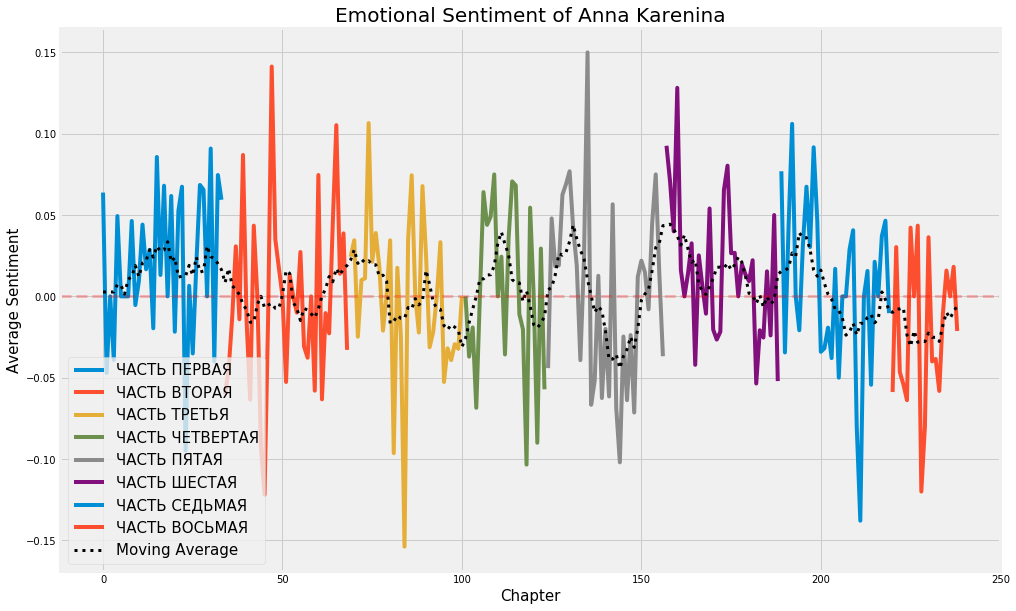

In [63]:
length = sum([len(ak[part]) for part in ak])
x = np.linspace(0, length - 1, num=length)
y = [ak[part][chapter][1]['positive'] - ak[part][chapter][1]['negative'] for part in ak for chapter in ak[part]]

plt.figure(figsize=(15, 10))
for book in book_indices:
    plt.plot(x[book_indices[book][0]: book_indices[book][1]],
             y[book_indices[book][0]: book_indices[book][1]],
             label=book)
plt.plot(movingaverage(y, 10), color='k', linewidth=3, linestyle=':', label = 'Moving Average')
plt.axhline(y=0, xmin=0, xmax=length, alpha=.25, color='r', linestyle='--', linewidth=3)
plt.legend(loc='best', fontsize=15)
plt.title('Emotional Sentiment of Anna Karenina', fontsize=20)
plt.xlabel('Chapter', fontsize=15)
plt.ylabel('Average Sentiment', fontsize=15)
plt.show()